In [2]:
# import os
# import cv2
# import pickle
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# import keras
# import tensorflow

# from tensorflow.keras.models import Model
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.applications import VGG19
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score 

In [3]:
# train_path = r'/content/drive/MyDrive/archive (1)/Multi-class Weather Dataset'

# val_path = r'/content/drive/MyDrive/archive (1)/validation'

Converting image to pixels

In [4]:
# for folder in os.listdir(train_path):
#     sub_path = train_path + "/" + folder
    
#     print(folder)
#     for i in range(2):
#         temp_path = os.listdir(sub_path)[i]
#         temp_path = sub_path + "/" + temp_path
#         img = mpimg.imread(temp_path)
#         imgplot = plt.imshow(img)
#         plt.show()

In [5]:
# def imagearray(path, size):
#     data = []
#     for folder in os.listdir(path):
#         sub_path=path+"/"+folder

#         for img in os.listdir(sub_path):
#             image_path=sub_path+"/"+img
#             img_arr=cv2.imread(image_path)
#             img_arr=cv2.resize(img_arr, size)
#             data.append(img_arr)
            
#     return data

In [6]:
# size = (250,250)

# train = imagearray(train_path, size)
# val = imagearray(val_path, size)

In [7]:

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam

prepraing data

In [8]:
train_path = '/Users/srijanratrey/PycharmProjects/MLA/MC_test'
test_path = '/Users/srijanratrey/PycharmProjects/MLA/MC_valid'


In [9]:
print(train_path)

/Users/srijanratrey/PycharmProjects/MLA/MC_test


Cloudy


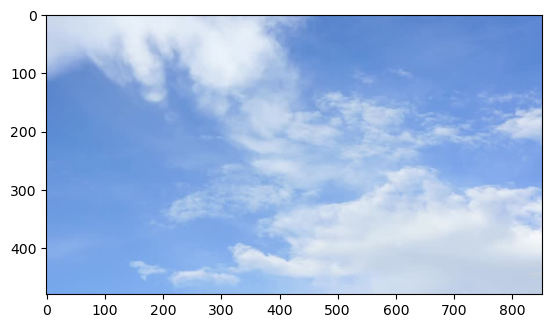

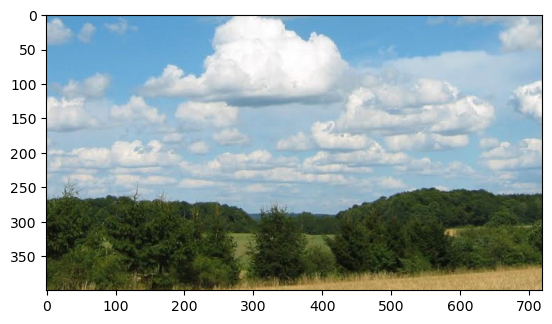

Rain


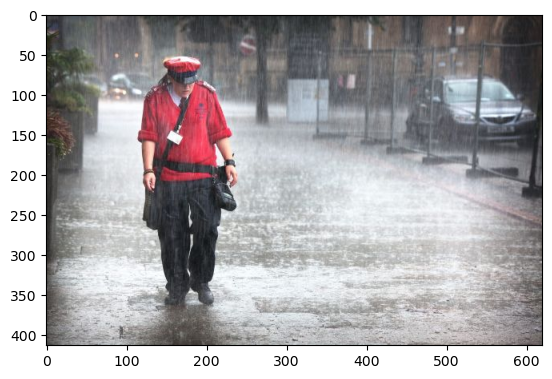

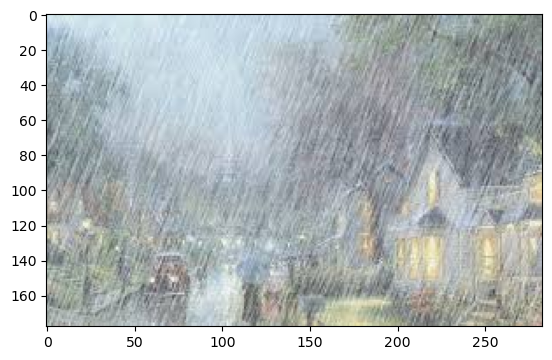

Shine


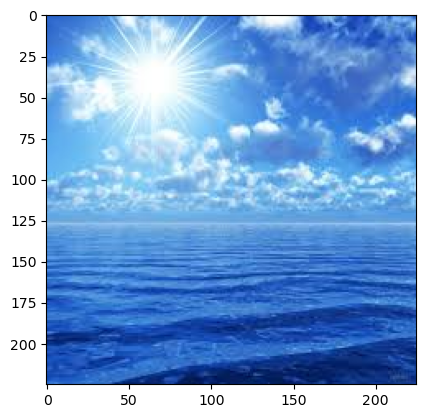

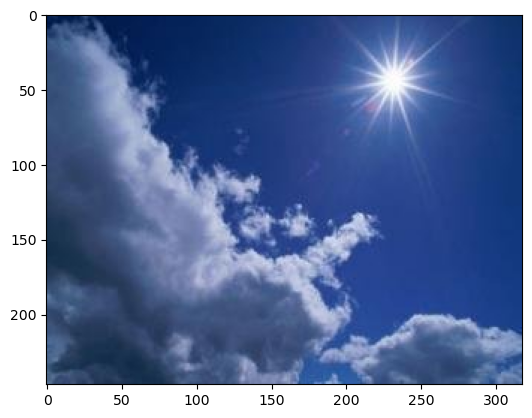

Sunrise


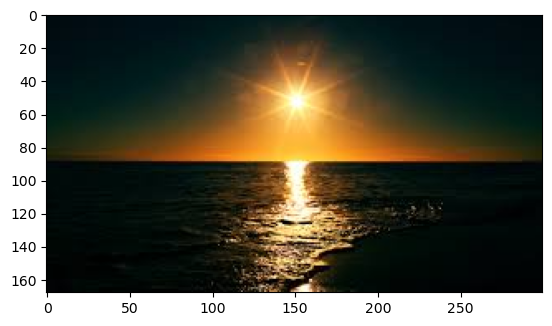

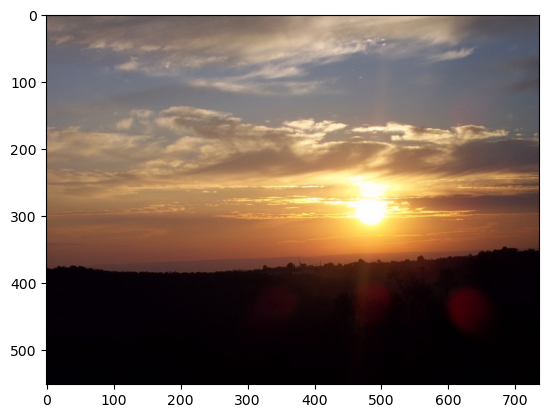

In [10]:
import matplotlib.image as mpimg
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    
    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [11]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  # validation_split=0.2,
  # subset="training",
  # seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
     

Found 1004 files belonging to 4 classes.
Metal device set to: Apple M1


2023-05-15 16:05:19.817236: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-15 16:05:19.818677: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_path,
  # validation_split=0.2,
  # subset="validation",
  # seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

     

Found 140 files belonging to 4 classes.


In [13]:
class_names = train_ds.class_names
print(class_names)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


2023-05-15 16:05:19.970224: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


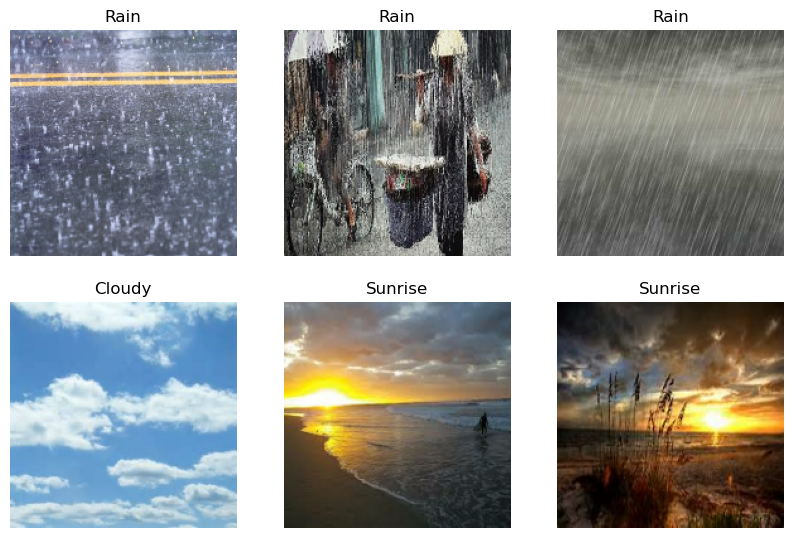

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [16]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 5)                2565      
 pper)                                                           
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
____________________________________

In [17]:
# resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
resnet_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [18]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_ds, 10)
y_test = to_categorical(val_ds, 10)
y_train.shape

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'BatchDataset'

In [19]:
epochs=4
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  steps_per_epoch=8
)

Epoch 1/4


2023-05-15 16:05:49.040197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 0.6005 - accuracy: 0.7773

2023-05-15 16:05:52.103193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 6s 544ms/step - loss: 0.6005 - accuracy: 0.7773 - val_loss: 0.1233 - val_accuracy: 0.9500
Epoch 2/4
8/8 [==============================] - 3s 417ms/step - loss: 0.1947 - accuracy: 0.9219 - val_loss: 0.0781 - val_accuracy: 0.9786
Epoch 3/4
8/8 [==============================] - 3s 416ms/step - loss: 0.2922 - accuracy: 0.9258 - val_loss: 0.0945 - val_accuracy: 0.9500
Epoch 4/4
8/8 [==============================] - 3s 412ms/step - loss: 0.1315 - accuracy: 0.9619 - val_loss: 0.1468 - val_accuracy: 0.9643


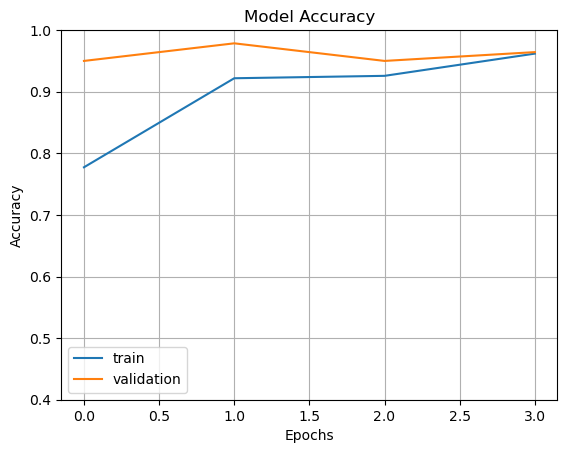

In [20]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

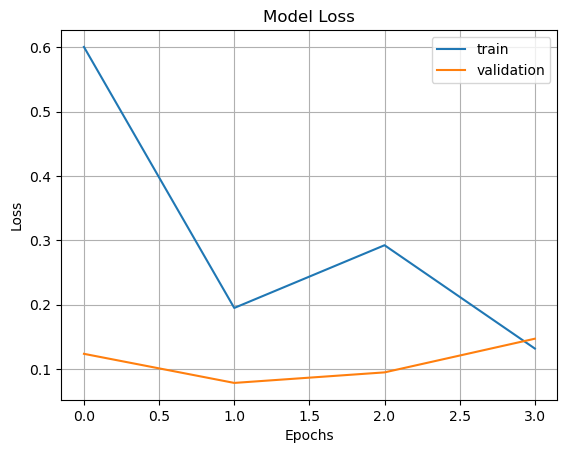

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
     

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
#d=accuracy_score(history.history['accuracy'],history.history['val_accuracy'])
batch_size = 32
#target_names = ['O', 'R']
Y_pred = history.predict(test_ds, 2513 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = metrics.confusion_matrix(test_ds.classes, y_pred)
print(cm)
print('Classification Report')
print(metrics.classification_report(test_ds.classes, y_pred))

AttributeError: 'History' object has no attribute 'predict'

In [ ]:
train_ds.class_indices

In [ ]:
ref = dict(zip(list(train_ds.class_indices.values()), list(train_ds.class_indices.keys())))

In [ ]:
pip install opencv-python 


In [ ]:

import cv2
image=cv2.imread("/Users/srijanratrey/PycharmProjects/MLA/MC_valid/sunrise/sunrise34.jpg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


In [ ]:
pred=resnet_model.predict(image)
print(pred)

In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)

In [ ]:
from skimage import io
#image of rain weather
img = io.imread("/content/drive/MyDrive/archive (1)/New/rain168.jpg")
io.imshow(img)

In [ ]:
import cv2
image=cv2.imread("/Users/srijanratrey/PycharmProjects/MLA/MC_valid/Rain/Rain6.jpg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

In [ ]:
pred=resnet_model.predict(image)
print(pred)

In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)

In [ ]:
pip install skimage

In [ ]:
import cv2
#image of sunrise weather
img = cv2.imread("/Users/srijanratrey/PycharmProjects/MLA/IMG_0612.JPG")
cv2.imshow('image',img)
cv2.waitKey(0)

In [ ]:
import cv2
image=cv2.imread("/Users/srijanratrey/PycharmProjects/MLA/IMG_0612.JPG")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
# print(image.shape)
pred=resnet_model.predict(image)
# print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)

In [ ]:
import cv2
image=cv2.imread("/content/drive/MyDrive/archive (1)/New/sunrise173.jpg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
# print(image.shape)
pred=resnet_model.predict(image)
# print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)

In [ ]:
from skimage import io
#image of sunrise weather
img = io.imread("/content/drive/MyDrive/archive (1)/New/sunrise172.jpg")
io.imshow(img)

In [ ]:
import cv2
image=cv2.imread("/content/drive/MyDrive/archive (1)/New/sunrise175.jpg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
# print(image.shape)
pred=resnet_model.predict(image)
# print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)

In [ ]:
from skimage import io
#image of sunrise weather
img = io.imread("/content/IMG20230422185826.jpg")
io.imshow(img)

In [ ]:
import cv2
image=cv2.imread("/content/IMG20230422185826.jpg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
# print(image.shape)
pred=resnet_model.predict(image)
# print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)

In [ ]:
from skimage import io
#image of sunrise weather
img = io.imread("/content/download (2).jpeg")
io.imshow(img)

In [ ]:
import cv2
image=cv2.imread("/content/download (2).jpeg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
# print(image.shape)
pred=resnet_model.predict(image)
# print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)

In [ ]:
from skimage import io
#image of sunrise weather
img = io.imread("/content/download.jpeg")
io.imshow(img)

In [ ]:
import cv2
image=cv2.imread("/content/download.jpeg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
# print(image.shape)
pred=resnet_model.predict(image)
# print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)

In [ ]:
from skimage import io
#image of sunrise weather
img = io.imread("/content/IMG20230422185802.jpg")
io.imshow(img)

In [ ]:
import cv2
image=cv2.imread("/content/IMG20230422185607.jpg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
# print(image.shape)
pred=resnet_model.predict(image)
# print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)

In [ ]:
from skimage import io
#image of sunrise weather
img = io.imread("/content/shine.jpeg")
io.imshow(img)

In [ ]:
import cv2
image=cv2.imread("/content/shine.jpeg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
# print(image.shape)
pred=resnet_model.predict(image)
# print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)